In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [2]:
# génère nb nombre de façon uniforme entre 0 et 1
U = lambda nb : uniform.rvs(size=nb)

# Méthode inverse généralisée

In [3]:
def inverse_generalisee(F_inv,nb):
    u = U(nb)
    return F_inv(u)

$ F(x) = 1 - \exp(-\lambda x)$ <br>
$ - \lambda x = \ln(1 - F(x))$ <br>
$ F^{-1}(x) = -\frac{1}{\lambda}\ln(1 - x)$

In [4]:
f = lambda x : 2*np.exp(-2*x)
F_inv = lambda x : -1/2*np.log(1 - x)

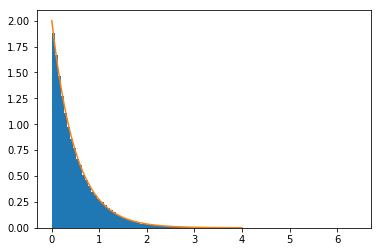

In [5]:
data = inverse_generalisee(F_inv,100000)
plt.hist(data,bins=100,density=True)
x = np.linspace(0,4,1000)
plt.plot(x,f(x))
plt.show()

# Méthode de Accept-Reject

In [6]:
def accept_reject(f, g, M, gen_U, gen_g):
    u = gen_U()
    x = gen_g()
    while f(x)/(M*g(x)) < u:
        u = gen_U()
        x = gen_g()
    return x

## Simulation de loi de cauchy

Loi de cauchy <br>
$ F(x) = \frac{1}{\pi}\arctan(x) + \frac{1}{2} $ <br>
$ F^{-1}(x) = \tan(\pi(x - \frac{1}{2}))$

In [7]:
f = lambda x : 1/(np.pi*(1+x**2))
F_inv = lambda x : np.tan(np.pi*(x-0.5))

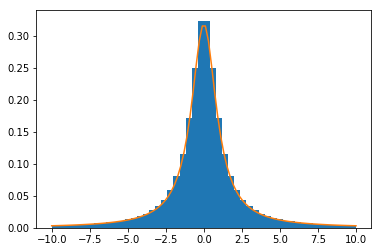

In [8]:
data = inverse_generalisee(F_inv,100000000)
plt.hist(data,bins=50,density=True,range=[-10,10])
x = np.linspace(-10,10,100)
plt.plot(x,f(x))
plt.show()

## Simulation de loi normale

In [9]:
gen_cauchy = lambda : inverse_generalisee(F_inv,1)[0]
gen_U = lambda : U(1)[0]

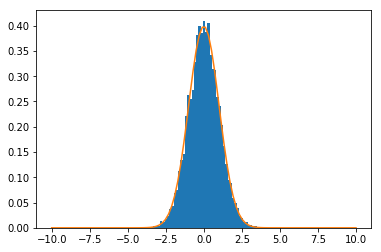

In [10]:
g = lambda x : 1/(np.pi*(1+x**2))
f = lambda x : 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
M = 2
data = []
for i in range(10000):
    data.append(accept_reject(f, g, M, gen_U, gen_cauchy))
plt.hist(data,bins=50,density=True)
x = np.linspace(-10,10,100)
plt.plot(x,f(x))
plt.show()

# Méthode de Box-Miller

In [11]:
def Box_Miller(nb):
    U1 = U(nb)
    U2 = U(nb)
    R = -2*np.log(U1)
    V = 2*np.pi*U2
    return np.sqrt(R)*np.cos(V)

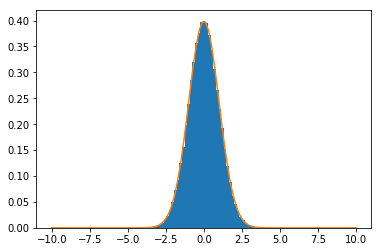

In [12]:
f = lambda x : 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
data = Box_Miller(100000)
plt.hist(data,bins=50,density=True)
x = np.linspace(-10,10,100)
plt.plot(x,f(x))
plt.show()

# Loi normale Multi-Variée

In [13]:
def loi_normale_multi_variee(Mu, Sigma):
    n = Mu.shape[0]
    Z = Box_Miller(n)
    A = np.linalg.cholesky(Sigma)
    return Mu + Z.dot(A)

In [14]:
mu = np.r_[1,-1]
sigma = np.array([[2,1],
                 [1,1]])
data = []
for i in range(100000):
    data.append(loi_normale_multi_variee(mu, sigma))


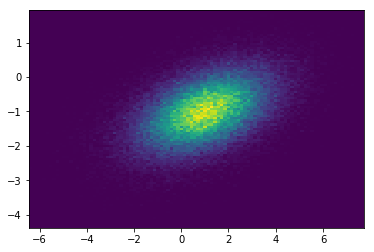

In [15]:
data = np.array(data)
x = data[:,0]
y = data[:,1]
plt.hist2d(x,y,bins=100)
plt.show()

# Loi de bernoulli

In [17]:
def Bernoulli(p,n):
    return U(n)<p

In [18]:
Bernoulli(0.7,10000).sum()/10000

0.7035

# MCMC

### Metropolis Hasting Indépendance

In [80]:
def MetropolisHastingInd(q,f,genQ,x0,burning,n):
    X = [x0]
    x_old = x0
    for i in range(n):
        x = genQ()
        if U(1) < (min((f(x)*q(x_old))/(f(x_old)*q(x)),1)):
            x_old = x
        else :
            1+1
        X.append(x_old)
    return X[burning:]
    

In [95]:
genQ = lambda : np.random.uniform(low=-20,high=20,size=1)
q    = lambda x : 1 if x>=-20 and x <=20  else 0 
f    = lambda x : np.exp(-x**2/2) 
L = MetropolisHastingInd(q,f,genQ,0,100,100000)

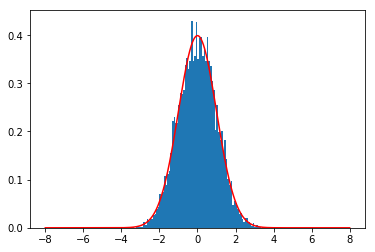

In [100]:
plt.hist(np.array(L),density=True, bins=100)
x= np.linspace(-8,8,1000)
plt.plot(x,f(x)/(np.sqrt(2*3.14)),'r')

In [112]:
f_deux_mode = lambda a1, mu1, a2, mu2,p : lambda x : p/(2*a1)*np.exp(-abs((x-mu1)/a1))+  (1-p)/(2*a2)*np.exp(-abs((x-mu2)/a2))
f = f_deux_mode(1,10,2,-5,0.3)
L = MetropolisHastingInd(q,f,genQ,0,100,100000)

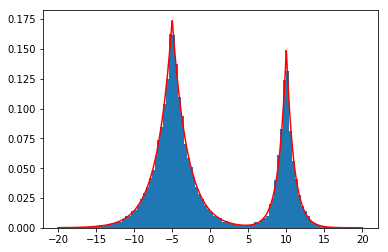

In [111]:
plt.hist(np.array(L),density=True, bins=100)
x= np.linspace(-20,20,1000)
plt.plot(x,f(x),'r')
plt.show()

# Monte Carlo parfait

In [19]:
def estimateur_esperence(f,gen_p,n):
    return np.mean(f(gen_p(n)))

In [23]:
gen_n_5_2 = lambda n : Box_Miller(n)*2 + 5
f1 = lambda x : x
estimateur_esperence(f1,gen_n_5_2,1000)

5.027217630075458

In [24]:
gen_n_5_2 = lambda n : Box_Miller(n)*2 + 5
f2 = lambda x : (x - 5)**2
estimateur_esperence(f2,gen_n_5_2,1000)

3.954844035766809

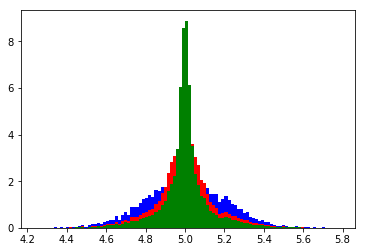

In [29]:
L = []
for i in range(10000):
    L.append(estimateur_esperence(f1,gen_n_5_2,100))
plt.hist(L,density=True,bins=100,color="blue")
for i in range(10000):
    L.append(estimateur_esperence(f1,gen_n_5_2,1000))
plt.hist(L,density=True,bins=100,color="red")
for i in range(10000):
    L.append(estimateur_esperence(f1,gen_n_5_2,10000))
plt.hist(L,density=True,bins=100,color="green")
plt.show()

We have $ Var(I_N(f)) = \frac{\sigma^2}{N}$